In [44]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv(r"D:\Data_Analytics\Machine learning\Datasets\diabetes.csv") 

In [46]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


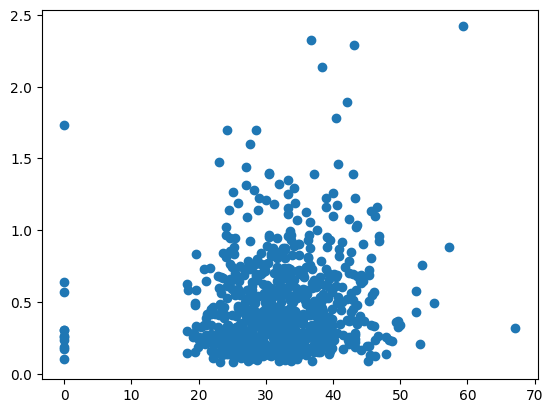

In [75]:
plt.scatter(x="BMI",y="DiabetesPedigreeFunction",data=data)


In [109]:
#x=data.iloc[:,:-1]
#y=data["Outcome"]
x=data[['BMI', 'DiabetesPedigreeFunction']]
y=data["Outcome"]

In [110]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [111]:
x,y

(      BMI  DiabetesPedigreeFunction
 0    33.6                     0.627
 1    26.6                     0.351
 2    23.3                     0.672
 3    28.1                     0.167
 4    43.1                     2.288
 ..    ...                       ...
 763  32.9                     0.171
 764  36.8                     0.340
 765  26.2                     0.245
 766  30.1                     0.349
 767  30.4                     0.315
 
 [768 rows x 2 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()

In [116]:
lr.fit(x_train,y_train)

LogisticRegression()

In [117]:
lr.score(x_test,y_test)*100

68.22916666666666

In [118]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Hakim\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


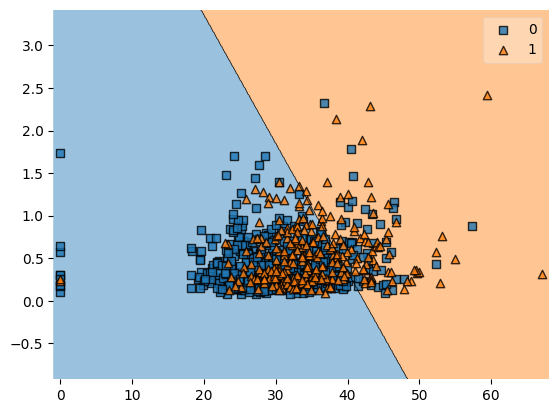

In [120]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

## Method 2 (Polynomial Feature)

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
x=data[['BMI', 'DiabetesPedigreeFunction']]
y=data["Outcome"]

In [123]:
pf = PolynomialFeatures()
pf.fit(x_train,y_train)
x=pd.DataFrame(pf.transform(x),)

In [124]:
x

,0,1,2,3,4,5
0,1.0,33.6,0.627,1128.96,21.0672,0.393129
1,1.0,26.6,0.351,707.56,9.3366,0.123201
2,1.0,23.3,0.672,542.89,15.6576,0.451584
3,1.0,28.1,0.167,789.61,4.6927,0.027889
4,1.0,43.1,2.288,1857.61,98.6128,5.234944
...,...,...,...,...,...,...
763,1.0,32.9,0.171,1082.41,5.6259,0.029241
764,1.0,36.8,0.340,1354.24,12.5120,0.115600
765,1.0,26.2,0.245,686.44,6.4190,0.060025
766,1.0,30.1,0.349,906.01,10.5049,0.121801


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [128]:
lr.fit(x_train,y_train)

C:\Users\Hakim\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
lr.score(x_test,y_test)

0.6979166666666666